In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Carga de datos y descripción del dataset

In [58]:
with open("wine.names") as f:
    print(f.read())

1. Title of Database: Wine recognition data
	Updated Sept 21, 1998 by C.Blake : Added attribute information

2. Sources:
   (a) Forina, M. et al, PARVUS - An Extendible Package for Data
       Exploration, Classification and Correlation. Institute of Pharmaceutical
       and Food Analysis and Technologies, Via Brigata Salerno, 
       16147 Genoa, Italy.

   (b) Stefan Aeberhard, email: stefan@coral.cs.jcu.edu.au
   (c) July 1991
3. Past Usage:

   (1)
   S. Aeberhard, D. Coomans and O. de Vel,
   Comparison of Classifiers in High Dimensional Settings,
   Tech. Rep. no. 92-02, (1992), Dept. of Computer Science and Dept. of
   Mathematics and Statistics, James Cook University of North Queensland.
   (Also submitted to Technometrics).

   The data was used with many others for comparing various 
   classifiers. The classes are separable, though only RDA 
   has achieved 100% correct classification.
   (RDA : 100%, QDA 99.4%, LDA 98.9%, 1NN 96.1% (z-transformed data))
   (All results usi

In [59]:
colnames = ['class', 'Alcohol', 'Malic_Acid', 'Ash', 'Alcalinity_of_ash', 'Magnesium', 'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols', 'Proanthocyanids', 'Color_intensity', 'Hue', 'OD280/OD250', 'Proline']
DatosVino = pd.read_csv('wine.data', names = colnames)
DatosVino.sample(10)


,class,Alcohol,Malic_Acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanids,Color_intensity,Hue,OD280/OD250,Proline
75,2,11.66,1.88,1.92,16.0,97,1.61,1.57,0.34,1.15,3.80,1.230,2.14,428
46,1,14.38,3.59,2.28,16.0,102,3.25,3.17,0.27,2.19,4.90,1.040,3.44,1065
62,2,13.67,1.25,1.92,18.0,94,2.10,1.79,0.32,0.73,3.80,1.230,2.46,630
70,2,12.29,1.61,2.21,20.4,103,1.10,1.02,0.37,1.46,3.05,0.906,1.82,870
69,2,12.21,1.19,1.75,16.8,151,1.85,1.28,0.14,2.50,2.85,1.280,3.07,718
18,1,14.19,1.59,2.48,16.5,108,3.30,3.93,0.32,1.86,8.70,1.230,2.82,1680
108,2,12.22,1.29,1.94,19.0,92,2.36,2.04,0.39,2.08,2.70,0.860,3.02,312
101,2,12.60,1.34,1.90,18.5,88,1.45,1.36,0.29,1.35,2.45,1.040,2.77,562
82,2,12.08,1.13,2.51,24.0,78,2.00,1.58,0.40,1.40,2.20,1.310,2.72,630
88,2,11.64,2.06,2.46,21.6,84,1.95,1.69,0.48,1.35,2.80,1.000,2.75,680


## Exploración de datos

In [60]:
DatosVino.describe()

,class,Alcohol,Malic_Acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanids,Color_intensity,Hue,OD280/OD250,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


<AxesSubplot:>

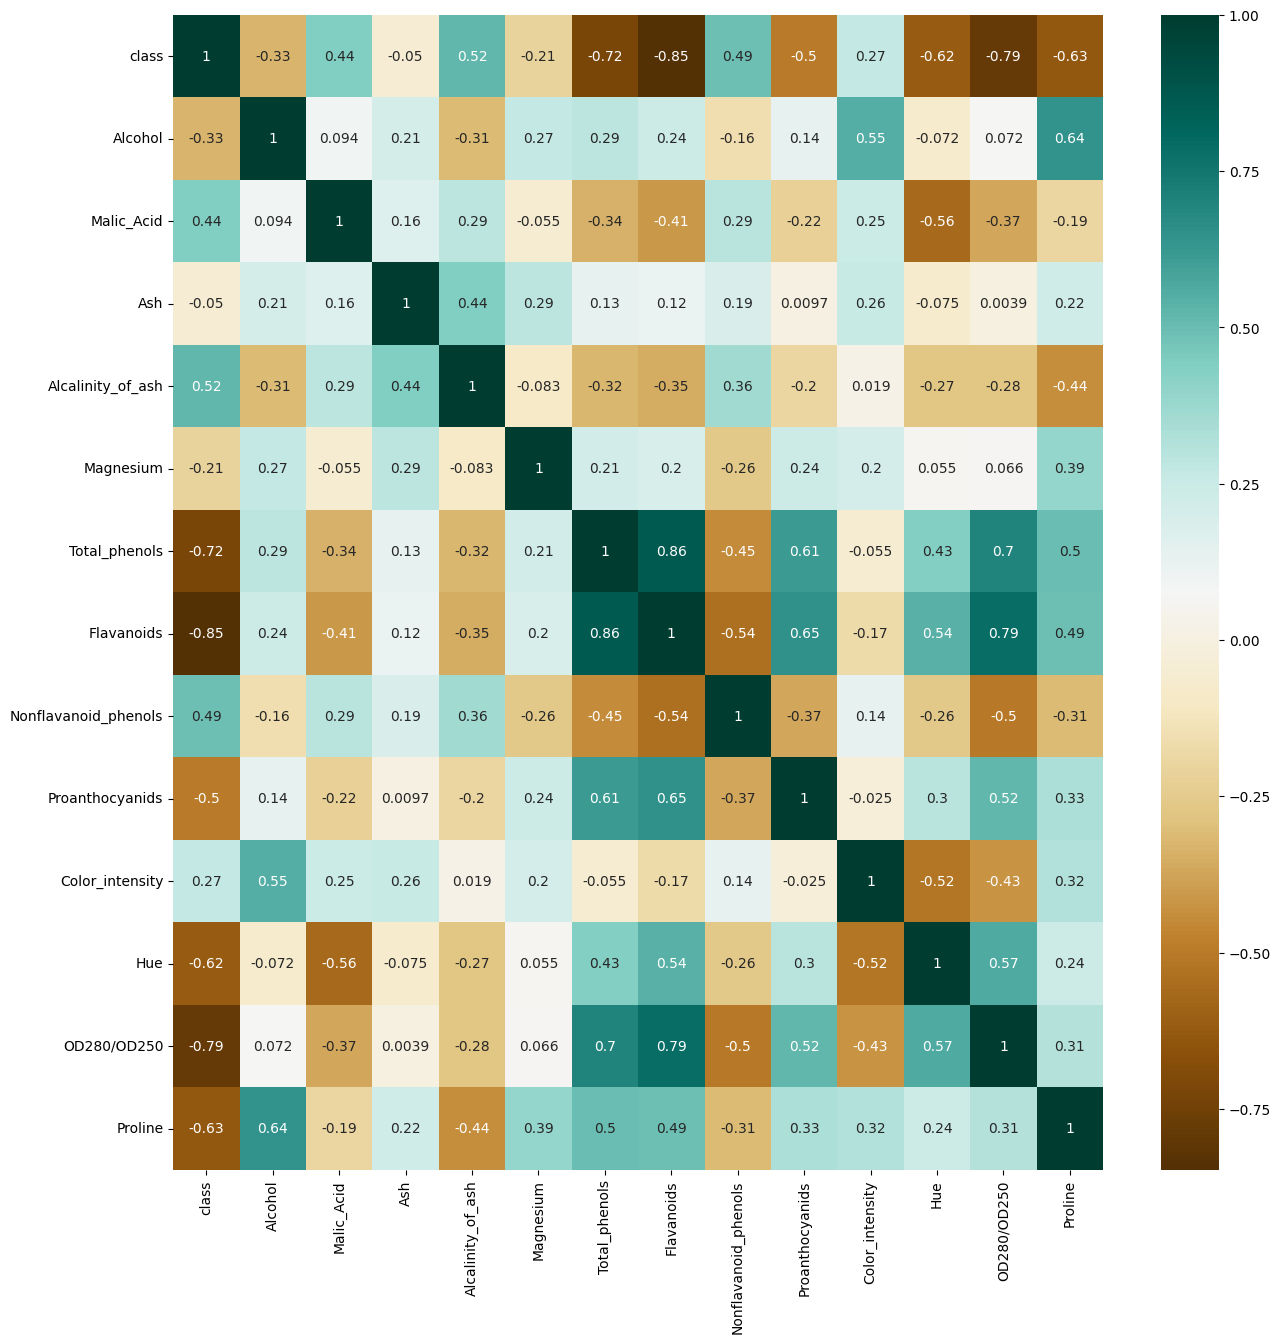

In [61]:

plt.figure(figsize = (15,15))
sns.heatmap(DatosVino.corr(), annot= True, cmap = 'BrBG')


Estos son los parámetros de todo el dataset. Para notar las diferencias entre clases, se procede a agrupar y a describirlos

In [62]:
temp = DatosVino.loc[DatosVino['class'] == 1] 

temp.describe()


   

,class,Alcohol,Malic_Acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanids,Color_intensity,Hue,OD280/OD250,Proline
count,59.0,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,1.0,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864
std,0.0,0.462125,0.688549,0.227166,2.546322,10.498949,0.338961,0.397494,0.070049,0.412109,1.238573,0.116483,0.357077,221.520767
min,1.0,12.850000,1.350000,2.040000,11.200000,89.000000,2.200000,2.190000,0.170000,1.250000,3.520000,0.820000,2.510000,680.000000
25%,1.0,13.400000,1.665000,2.295000,16.000000,98.000000,2.600000,2.680000,0.255000,1.640000,4.550000,0.995000,2.870000,987.500000
50%,1.0,13.750000,1.770000,2.440000,16.800000,104.000000,2.800000,2.980000,0.290000,1.870000,5.400000,1.070000,3.170000,1095.000000
75%,1.0,14.100000,1.935000,2.615000,18.700000,114.000000,3.000000,3.245000,0.320000,2.090000,6.225000,1.130000,3.420000,1280.000000
max,1.0,14.830000,4.040000,3.220000,25.000000,132.000000,3.880000,3.930000,0.500000,2.960000,8.900000,1.280000,4.000000,1680.000000


In [63]:
temp = DatosVino.loc[DatosVino['class'] == 2] 

temp.describe()

,class,Alcohol,Malic_Acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanids,Color_intensity,Hue,OD280/OD250,Proline
count,71.0,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000
mean,2.0,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042
std,0.0,0.537964,1.015569,0.315467,3.349770,16.753497,0.545361,0.705701,0.123961,0.602068,0.924929,0.202937,0.496573,157.211220
min,2.0,11.030000,0.740000,1.360000,10.600000,70.000000,1.100000,0.570000,0.130000,0.410000,1.280000,0.690000,1.590000,278.000000
25%,2.0,11.915000,1.270000,2.000000,18.000000,85.500000,1.895000,1.605000,0.270000,1.350000,2.535000,0.925000,2.440000,406.500000
50%,2.0,12.290000,1.610000,2.240000,20.000000,88.000000,2.200000,2.030000,0.370000,1.610000,2.900000,1.040000,2.830000,495.000000
75%,2.0,12.515000,2.145000,2.420000,22.000000,99.500000,2.560000,2.475000,0.430000,1.885000,3.400000,1.205000,3.160000,625.000000
max,2.0,13.860000,5.800000,3.230000,30.000000,162.000000,3.520000,5.080000,0.660000,3.580000,6.000000,1.710000,3.690000,985.000000


In [64]:
temp = DatosVino.loc[DatosVino['class'] == 3] 

temp.describe()

,class,Alcohol,Malic_Acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanids,Color_intensity,Hue,OD280/OD250,Proline
count,48.0,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.00000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,3.0,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.44750,1.153542,7.396250,0.682708,1.683542,629.895833
std,0.0,0.530241,1.087906,0.184690,2.258161,10.890473,0.356971,0.293504,0.12414,0.408836,2.310942,0.114441,0.272111,115.097043
min,3.0,12.200000,1.240000,2.100000,17.500000,80.000000,0.980000,0.340000,0.17000,0.550000,3.850000,0.480000,1.270000,415.000000
25%,3.0,12.805000,2.587500,2.300000,20.000000,89.750000,1.407500,0.580000,0.39750,0.855000,5.437500,0.587500,1.510000,545.000000
50%,3.0,13.165000,3.265000,2.380000,21.000000,97.000000,1.635000,0.685000,0.47000,1.105000,7.550000,0.665000,1.660000,627.500000
75%,3.0,13.505000,3.957500,2.602500,23.000000,106.000000,1.807500,0.920000,0.53000,1.350000,9.225000,0.752500,1.820000,695.000000
max,3.0,14.340000,5.650000,2.860000,27.000000,123.000000,2.800000,1.570000,0.63000,2.700000,13.000000,0.960000,2.470000,880.000000


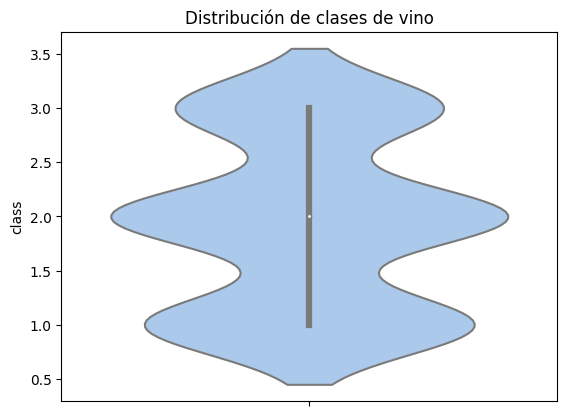

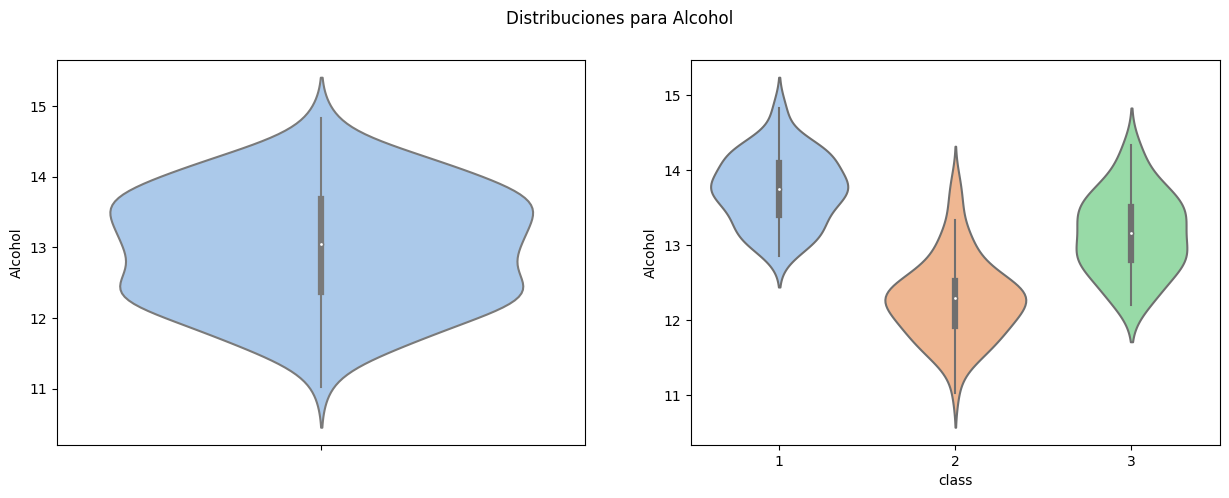

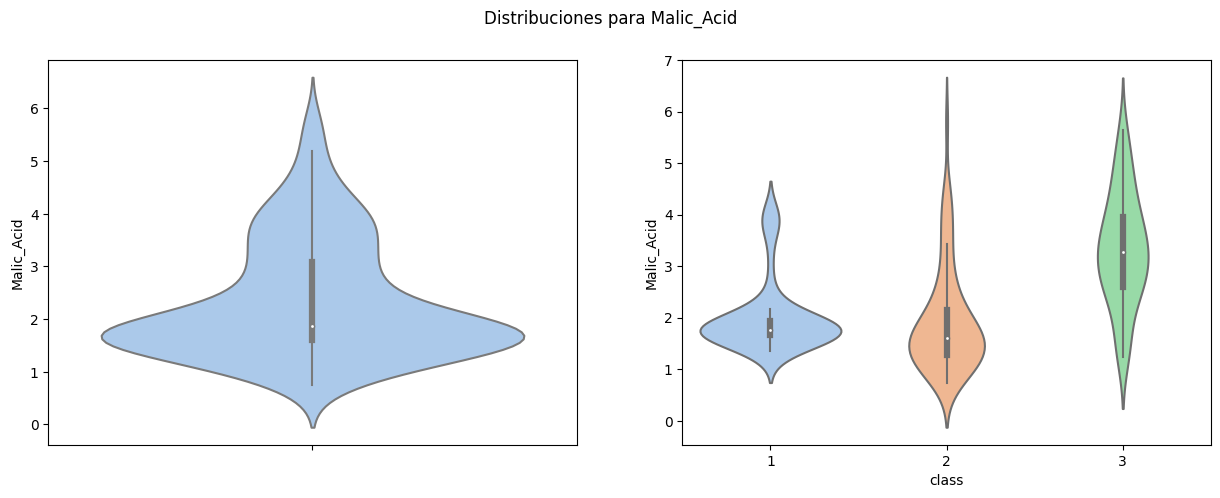

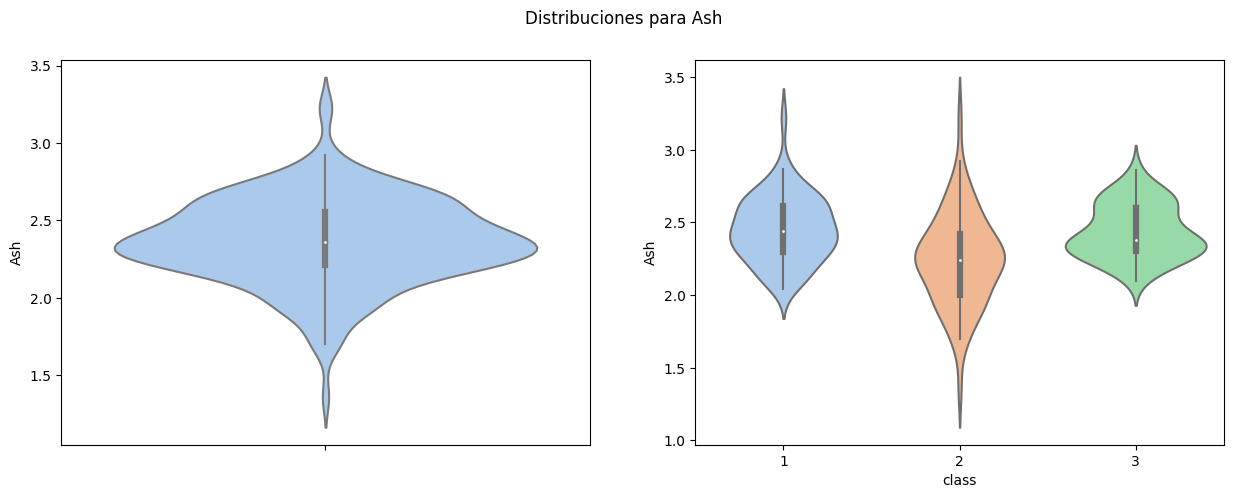

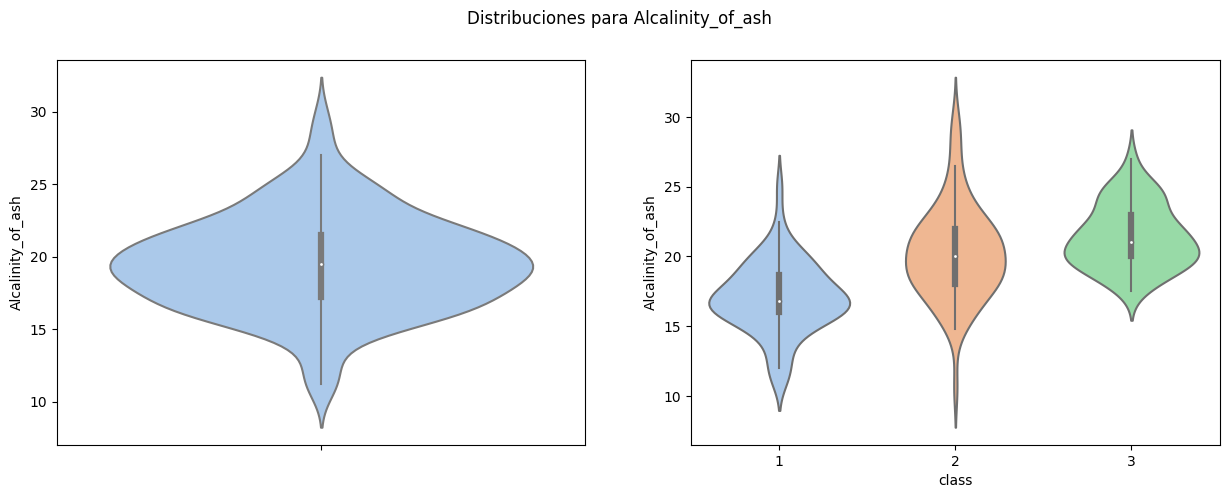

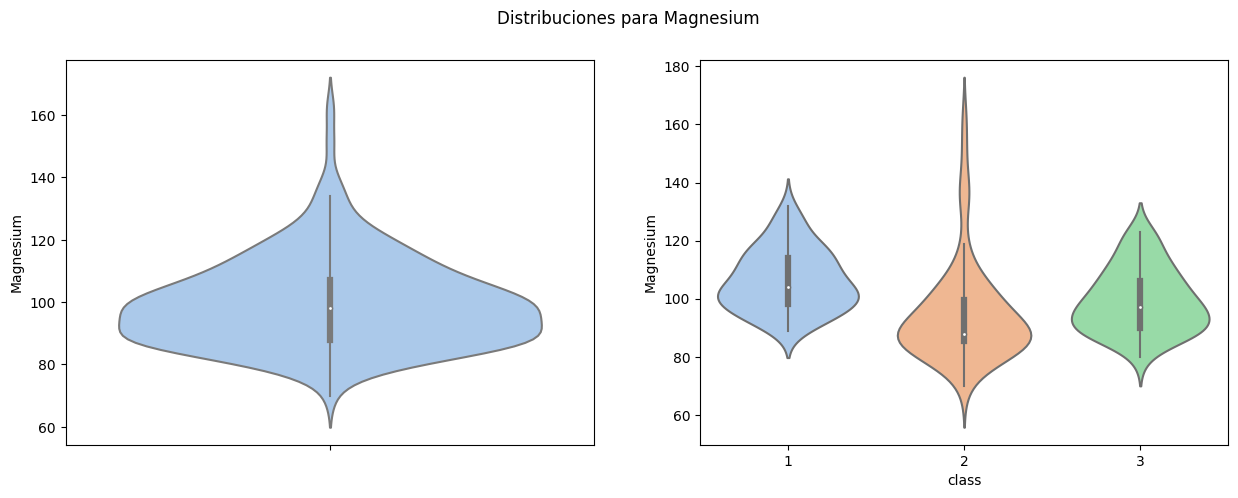

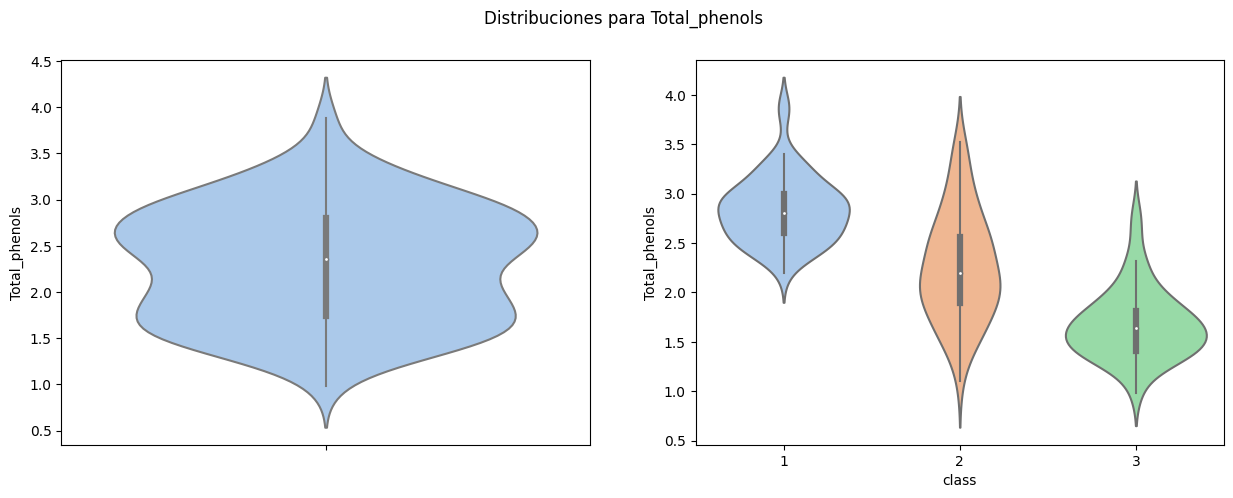

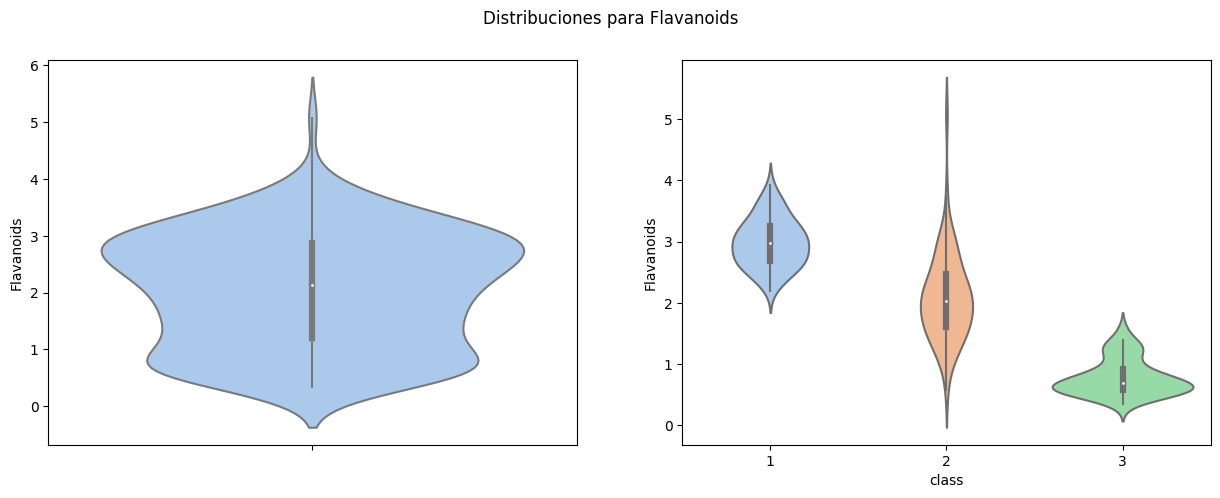

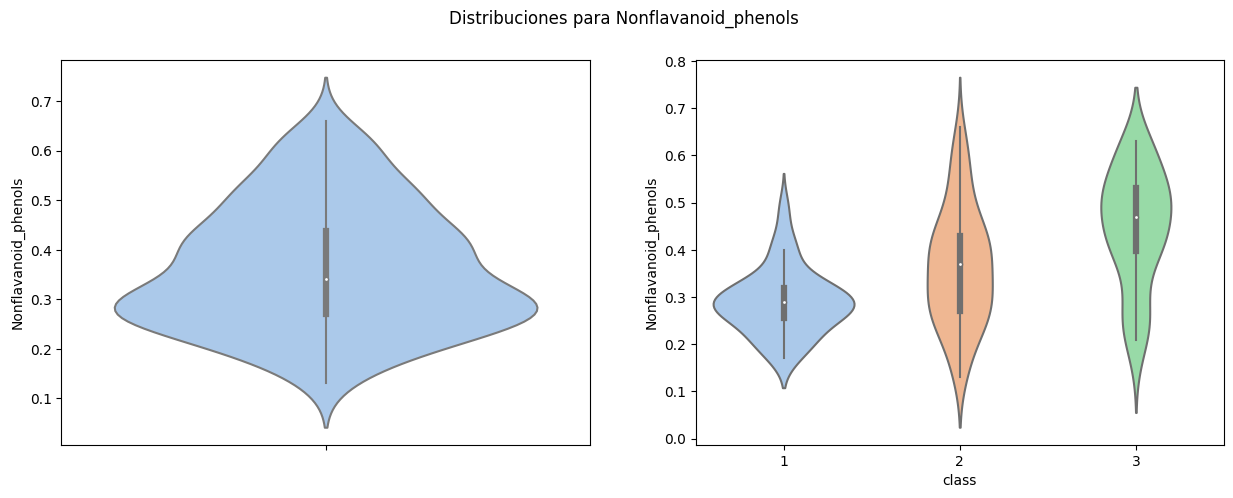

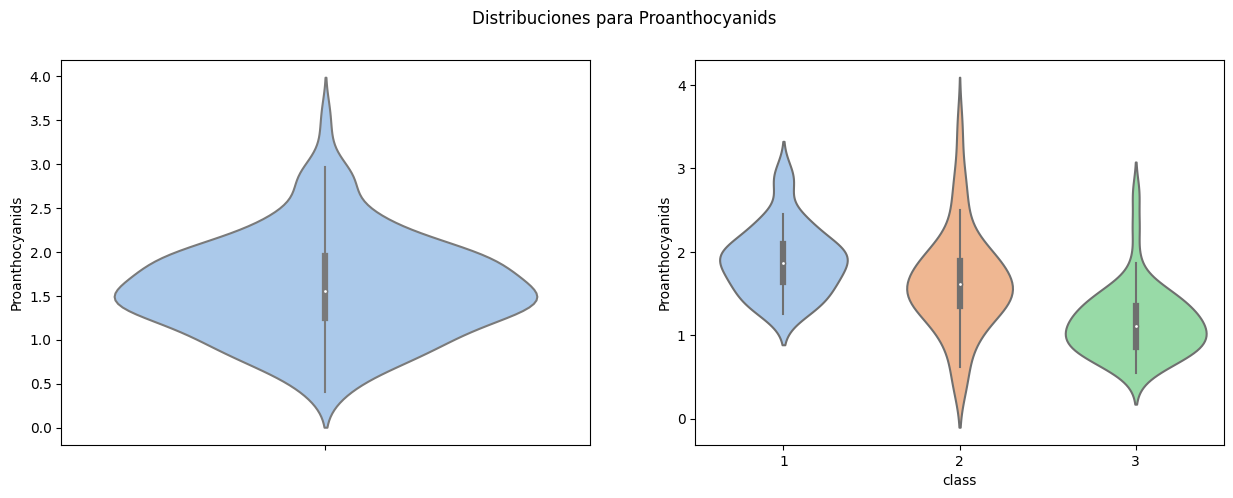

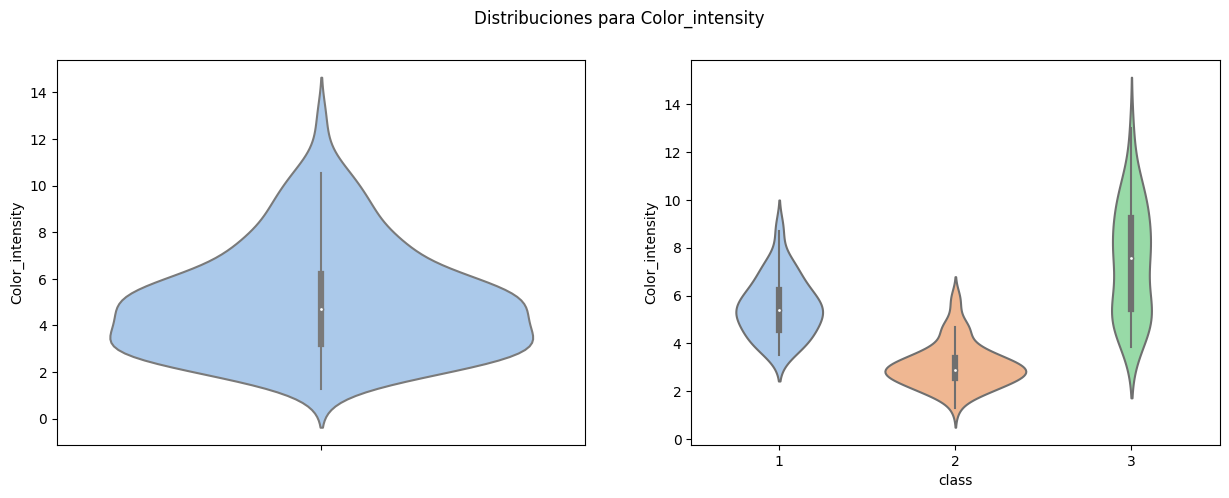

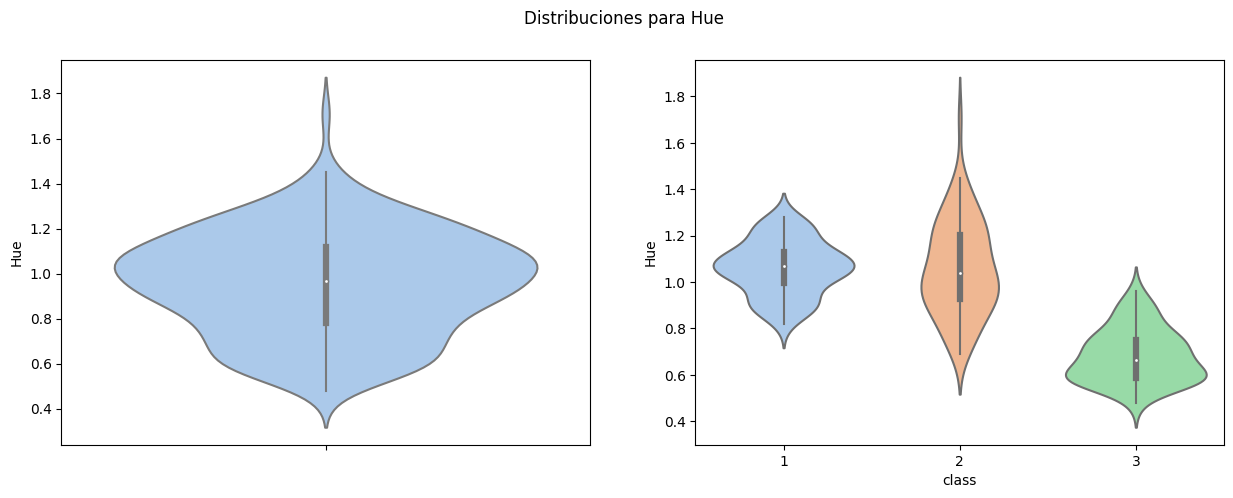

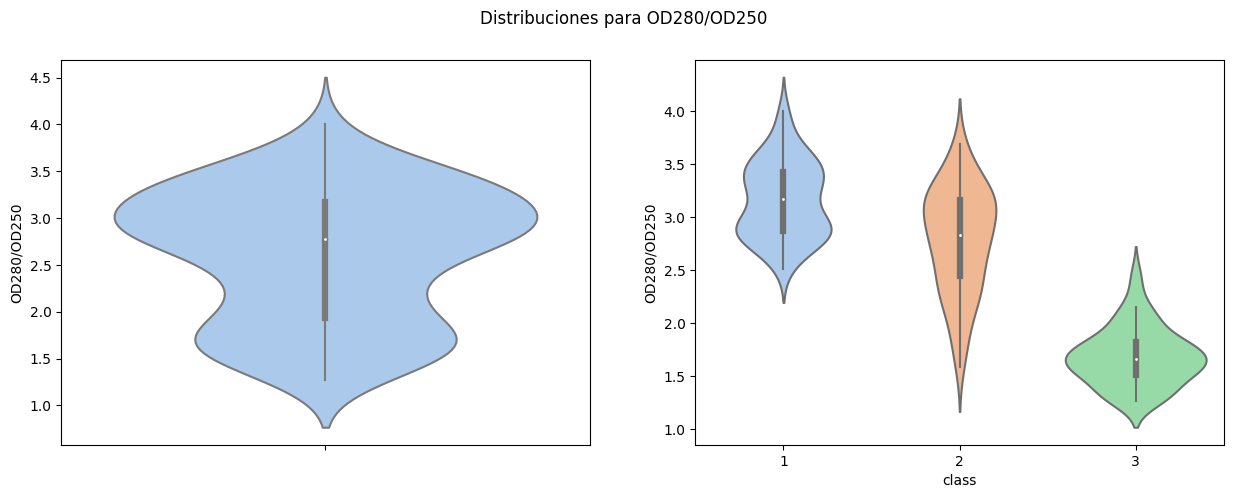

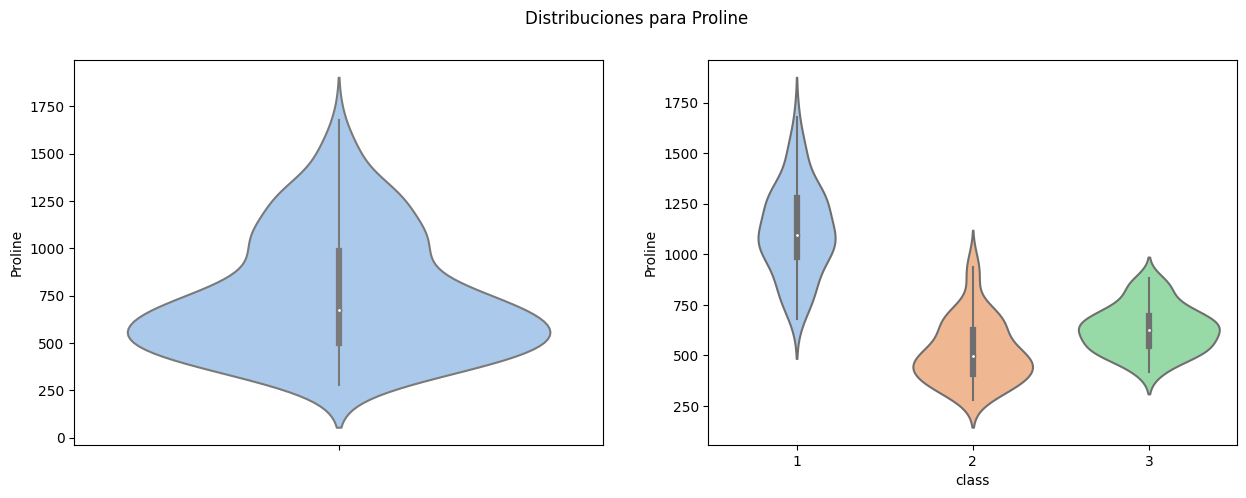

In [71]:

for value in DatosVino.columns:
    if value != 'class':
        fig,axes = plt.subplots(1,2, figsize = (15,5))
        fig.suptitle(f'Distribuciones para {value}')
        sns.violinplot(ax = axes[0],data = DatosVino, y = value, palette = 'pastel')
        sns.violinplot(ax = axes[1], data = DatosVino, x = 'class', y = value, palette = 'pastel')
    else:
        plt.title('Distribución de clases de vino')
        sns.violinplot(data = DatosVino, y = value, palette = 'pastel')
        plt.show()
    

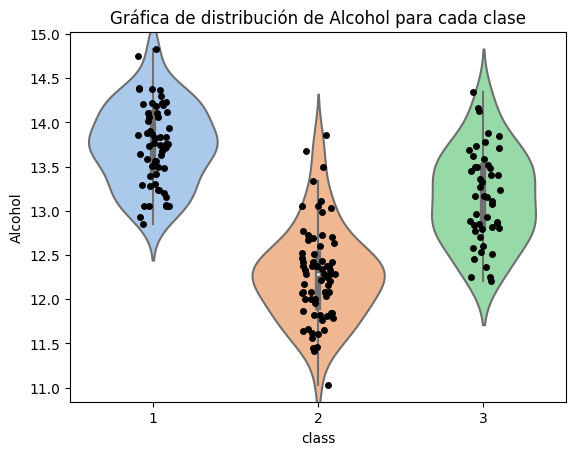

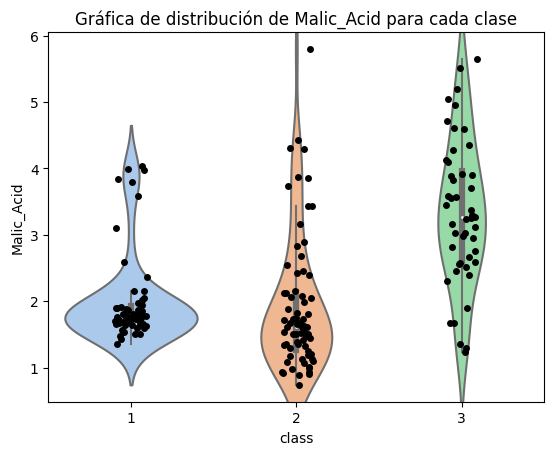

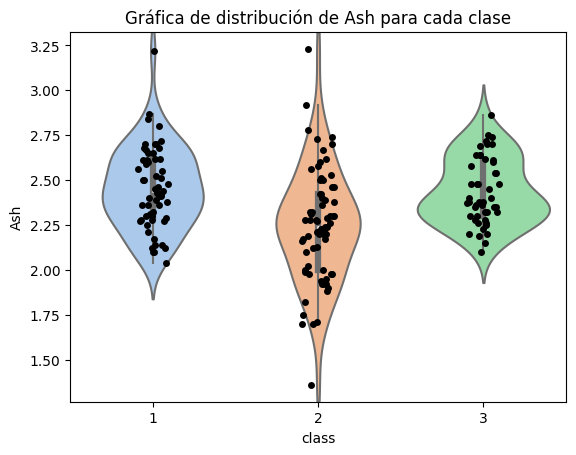

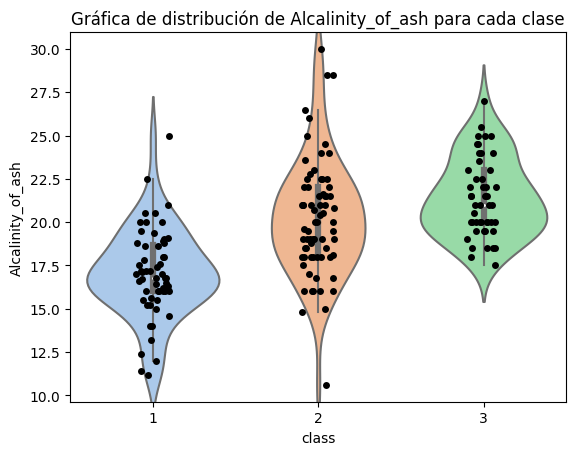

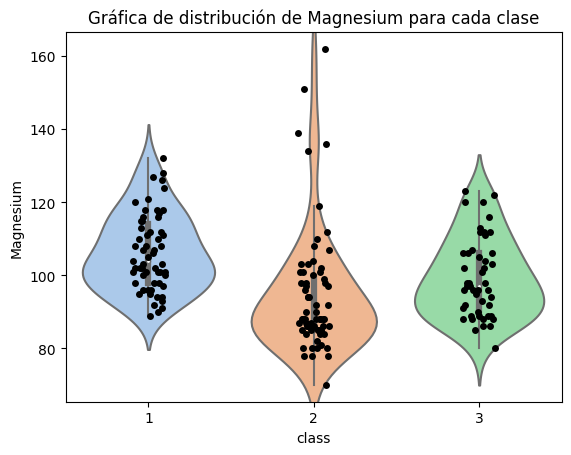

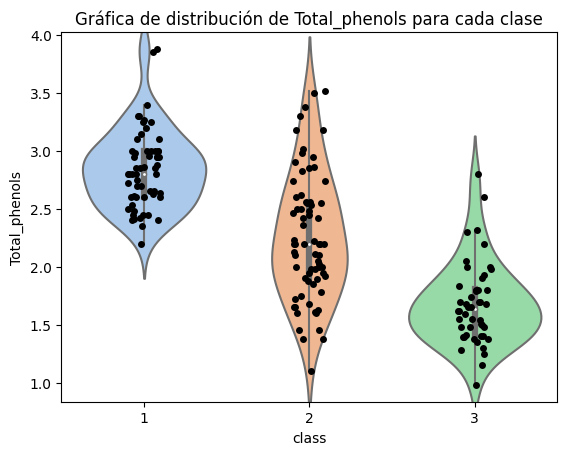

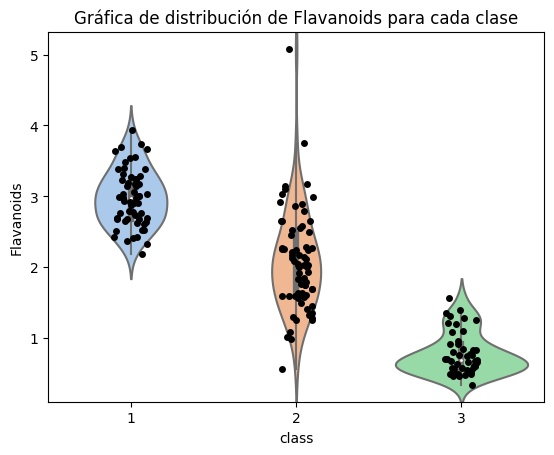

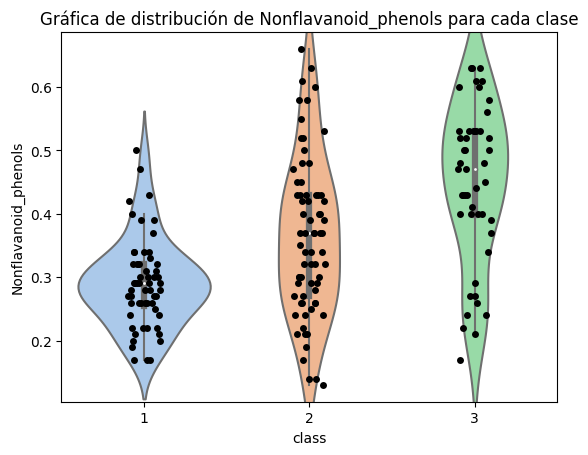

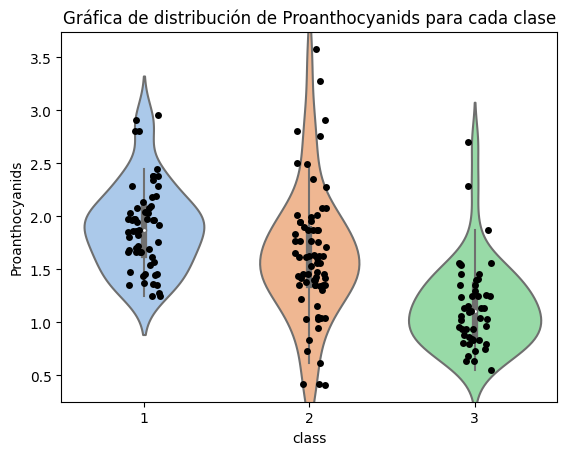

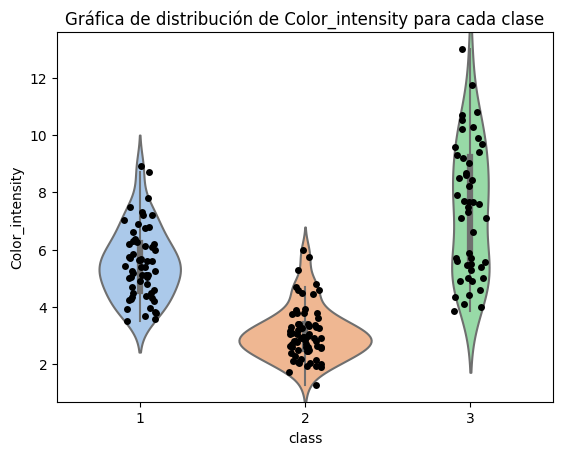

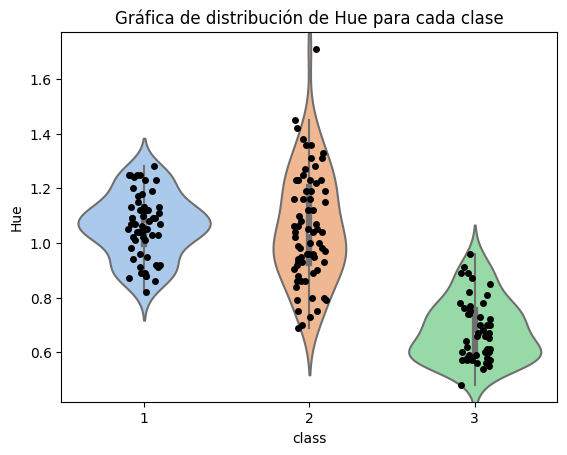

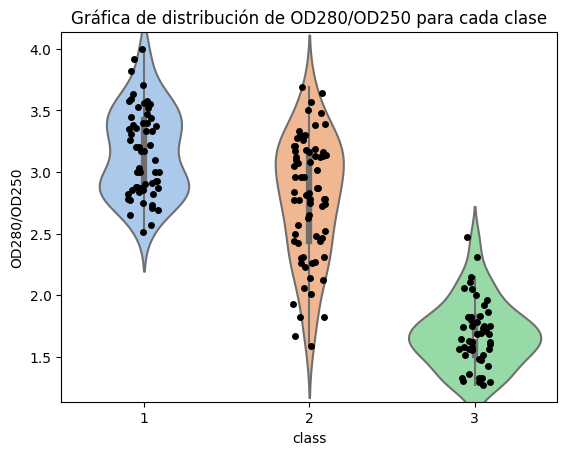

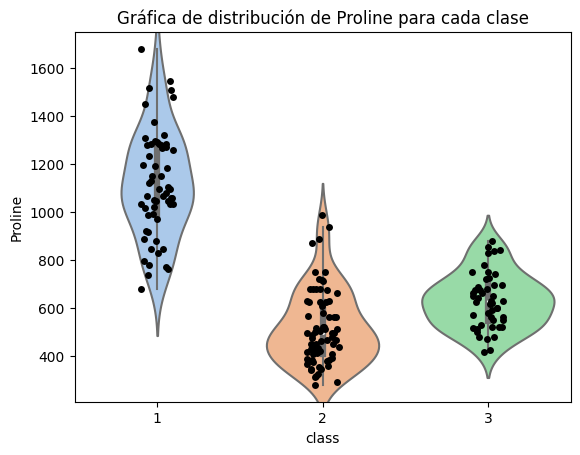

In [73]:


for value in DatosVino.columns:
    if value != 'class':
        plt.title(f'Gráfica de distribución de {value} para cada clase')
        sns.violinplot(data = DatosVino, x = 'class', y = value, palette = 'pastel')
        sns.stripplot(data = DatosVino, x = 'class', y = value, color = 'black')
        plt.show()

## Modelo a utilizar

Debido a la naturaleza de las variables independientes dentro de este dataset, se determinó que lo mejor es utilizar un modelo de clasificación, y el elegido fue KNN. Se optó por KNN debido a que los datos no son variables discretas, sino más bien valores continuos. Esto hace que modelos como Decision Trees no puedan ser utilizados, pero es donde los modelos como KNN relucen.

Además, se desea realizar el análisis con los datos estandarizados y no estandarizados. De esta manera, se podrá observar si este proceso influye en la accuracy del modelo.

Como parte del análisis de la efectividad del modelo a utilizar, se realizarán las mismas pruebas utilizando un modelo de K-means. Finalmente se comparará con qué modelo arrojó mejores resultados

### Modelo KNN

#### Modelo sin datos estandarizados

#### Modelo con datos estandarizados

### Modelo K-means

Para comparar otros modelos, se utilizará el modelo de K-means, y se comparará 

#### Modelo sin datos estandarizados

#### Modelo con datos estandarizados

### Comparación entre modelos

## Conclusiones